# Project: Problem Statement - Personal Loan Campaign Modelling

**Thera Bank Personal Loan Campaign**
 
**Data Description:**
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

**Domain:**
Banking

 

**Context:**
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

**Attribute Information:**
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer 
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?
 

**Learning Outcomes:**
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

**Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal loans.


# PGP in AIML Business Applciations
# Batch : PGP-AIML-BA-UTA-Sept20-C
# Name : Malleswara Rao Polimera

# **1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)**

In [54]:
#Load Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve,classification_report

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [55]:
#Load data
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# read_csv is used to read csv files

In [56]:
#Check datatype
print("************************************************")
print("Number of Rows and Columns of the Loan Dataset");
print(loan_df.shape);
print("************************************************")
loan_df.info()

************************************************
Number of Rows and Columns of the Loan Dataset
(5000, 14)
************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 1

**OBSERVATIONS:**
- All the given attributes are integers except CCAvg which is Float value.
- Some of the columns are categorical which are in int64, need to convert them to categorical

In [57]:
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [58]:
# If there are any null values in data set
loan_df.isnull().values.any() 

False

**OBSERVATIONS:**
- Total Number of Rows and Non Null values of each column are same and no Null values identified.
- Total 5000 cusomers are included in the dataframe.

In [59]:
#Lets analysze the distribution of the various attribute
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


**OBSERVATIONS:**
- Experience shown min number as negitive some are zeros with minimum income as 8 
- Imputaion required to correct this data

In [60]:
loan_df[loan_df["Experience"]<=0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
105,106,24,0,35,94704,3,0.10,2,0,0,1,0,1,0
151,152,26,0,132,92834,3,6.50,3,0,1,0,0,0,1
155,156,24,0,60,94596,4,1.60,1,0,0,0,0,1,0
156,157,26,0,15,92131,4,0.40,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,4902,26,0,54,96094,3,1.10,2,0,0,0,0,1,0
4934,4935,26,0,85,93950,2,1.60,3,0,0,0,0,1,1
4943,4944,26,0,12,96003,1,0.10,2,0,0,0,0,1,0
4957,4958,29,-1,50,95842,2,1.75,3,0,0,0,0,0,1


**OBSERVATIONS:**
- 118 rows are with negitive or zero experience and with some income shown. 

In [61]:
#Imputation for Experience 
loan_df.loc[loan_df[loan_df['Experience']<=0].index,'Experience'] = np.nan
loan_df['Experience'] = loan_df['Experience'].fillna(loan_df['Experience'].mean())

In [62]:
loan_df.isnull().values.sum()

0

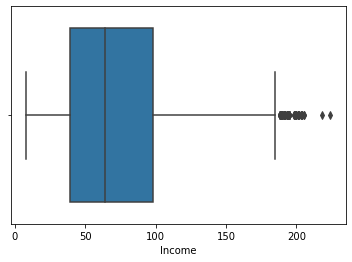

In [63]:
sns.boxplot(loan_df['Income'])
plt.show()

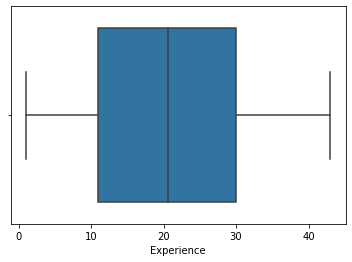

In [64]:
sns.boxplot(loan_df['Experience'])
plt.show()

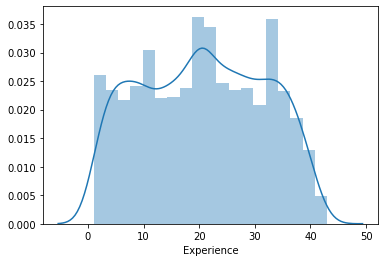

In [65]:
sns.distplot(loan_df['Experience'])
plt.show()

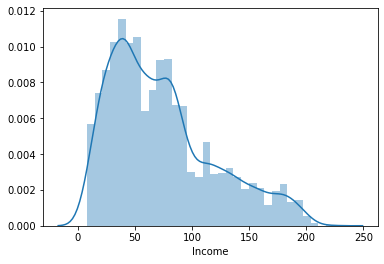

In [66]:
sns.distplot(loan_df['Income'])
plt.show()

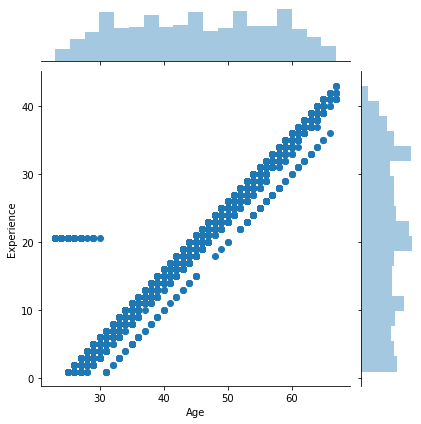

In [67]:
sns.jointplot(loan_df['Age'],loan_df['Experience'])
plt.show()

**OBSERVATIONS:**
- Age and Experience attributes are dependent and linear so we can drop one of the attribute. 

**Review Data**

# **2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)**
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

In [68]:
#Number of unique in each column
loan_df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [69]:
# drop ID as they are always unique 
loan_df.drop('ID',axis=1).nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**OBSERVATIONS:**
- Family and Education are categorical 
- ID column is unique for each record and that would not provide any info to the algorithm

In [70]:
# dropping ID column as it will be 1-1 mapping anyways
loan_df = loan_df.drop('ID', axis =1 ) 

In [71]:
#Number of people with zero mortgage
loan_df[loan_df['Mortgage']==0]['Mortgage'].count()

3462

In [72]:
#Number of people with zero credit card spending per month?
loan_df[loan_df['CCAvg']==0]['CCAvg'].count()

106

In [73]:
#Value counts of all categorical columns
loan_df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [74]:
#categorical - Zipcode
loan_df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [75]:
loan_df['ZIP Code'].value_counts(normalize=True)

94720   0.03
94305   0.03
95616   0.02
90095   0.01
93106   0.01
        ... 
96145   0.00
94970   0.00
94598   0.00
90068   0.00
94087   0.00
Name: ZIP Code, Length: 467, dtype: float64

**OBSERVATIONS:** Data destribution with ZIP Code is not significant to include in the model.

In [76]:
#categorical - Education
loan_df['Education'].value_counts()
#1: Undergrad;
#2: Graduate; 
#3: Advanced/Professional

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [77]:
loan_df.groupby('Education').mean()
#1: Undergrad;
#2: Graduate; 
#3: Advanced/Professional

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Education,,,,,,,,,,,,
1,44.96,20.40,85.59,"93,147.20",2.24,2.26,61.63,0.04,0.11,0.06,0.60,0.30
2,45.04,20.32,64.31,"93,278.68",2.65,1.69,51.32,0.13,0.11,0.06,0.61,0.29
3,46.14,21.16,66.12,"93,041.97",2.38,1.72,54.18,0.14,0.10,0.06,0.58,0.29


In [78]:
loan_df['Education'].value_counts(normalize=True)

1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64

**OBSERVATIONS:**
- Undergrads are 2096 , Graduates are 1403 and Advanced/Professioanls are 1501
- Education categories are having significant data distributions so create dammies will help to improve

In [79]:
#categorical - Family 
loan_df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [80]:
loan_df.groupby('Family').mean()

,Age,Experience,Income,ZIP Code,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Family,,,,,,,,,,,,
1,45.76,20.78,78.62,"93,107.95",2.07,1.86,55.67,0.07,0.10,0.06,0.60,0.28
2,45.49,21.00,84.24,"93,157.81",2.24,1.78,63.63,0.08,0.10,0.05,0.58,0.31
3,46.12,21.19,66.90,"93,191.73",1.70,1.93,53.62,0.13,0.10,0.08,0.60,0.29
4,44.02,19.49,62.51,"93,168.12",1.66,1.97,52.31,0.11,0.11,0.06,0.61,0.30


In [81]:
loan_df['Family'].value_counts(normalize=True)

1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64

**OBSERVATIONS:**
- Family categories are having significant data distributions so create dammies will help to improve

In [82]:
#categorical - get a data frame of all the 0/1 categories attributes 
loan_df_cat = loan_df.copy()
loan_df_cat = loan_df.drop(labels=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'],axis=1,inplace=False)

In [83]:
loan_df_cat.head()

,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [84]:
loan_df_cat.apply(pd.Series.value_counts)

,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4520,4478,4698,2016,3530
1,480,522,302,2984,1470


In [85]:
#Security Account
loan_df['Securities Account'].value_counts(normalize=True)

0   0.90
1   0.10
Name: Securities Account, dtype: float64

In [86]:
#CD Account
loan_df['CD Account'].value_counts(normalize=True)

0   0.94
1   0.06
Name: CD Account, dtype: float64

In [87]:
#Online
loan_df['Online'].value_counts(normalize=True)

1   0.60
0   0.40
Name: Online, dtype: float64

In [88]:
#CreditCard
loan_df['CreditCard'].value_counts(normalize=True)

0   0.71
1   0.29
Name: CreditCard, dtype: float64

**OBSERVATIONS:**
- Securities Accounts and CD Accounts are more concentrated at '0' 
- significant destribution observed between 0 or 1 for Online and CreditCard attributes

In [89]:
#Convert Categorical attributes as categorical variable to create dummies later in the process
loan_df['Education'] = loan_df['Education'].astype('category')
loan_df['Family'] = loan_df['Family'].astype('category')

In [90]:
loan_df.dtypes

Age                      int64
Experience             float64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

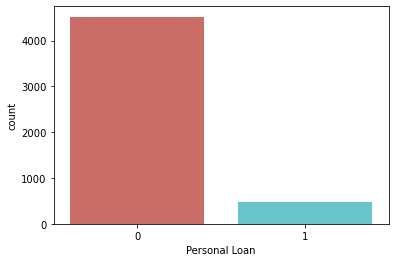

In [91]:
sns.countplot(x='Personal Loan',data=loan_df_cat,palette='hls')
plt.show()

In [92]:
count_no_PL = len(loan_df_cat[loan_df_cat['Personal Loan']==0])
count_PL = len(loan_df_cat[loan_df_cat['Personal Loan']==1])
pct_of_no_PL = count_no_PL/(count_no_PL+count_PL)
print("percentage of no Personal Loan is", pct_of_no_PL*100)
pct_of_PL= count_PL/(count_no_PL+count_PL)
print("percentage of Personal Loan", pct_of_PL*100)

percentage of no Personal Loan is 90.4
percentage of Personal Loan 9.6


**OBSERVATIONS:
The  Personal Loan value counts looks like some data inbalance because buying customers (480) is around 10% of not buying ones. let’s do some more exploration.** 

**Univariate and Bivariate**

In [93]:
loan_df.groupby('Personal Loan').mean()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.37,20.65,66.24,"93,152.43",1.73,51.79,0.10,0.04,0.60,0.29
1,45.07,20.14,144.75,"93,153.20",3.91,100.85,0.12,0.29,0.61,0.30


**OBSERVATIONS:** 
- the average Income of customers who got Personal Loan is higher than that of the customers who didn't
- the CCAvg spending is more for the customers who got personal Loan
- Similarly average Mortgage is more for the customers who got personal Loan 

**Visualizations**

In [94]:
#Target attribute to do Histogram analysis for all other independent attributes 
loan_df_H = loan_df.drop(labels=['Personal Loan'],axis=1,inplace=False)
loan_df_H.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.00,49,91107,4,1.60,1,0,1,0,0,0
1,45,19.00,34,90089,3,1.50,1,0,1,0,0,0
2,39,15.00,11,94720,1,1.00,1,0,0,0,0,0
3,35,9.00,100,94112,1,2.70,2,0,0,0,0,0
4,35,8.00,45,91330,4,1.00,2,0,0,0,0,1


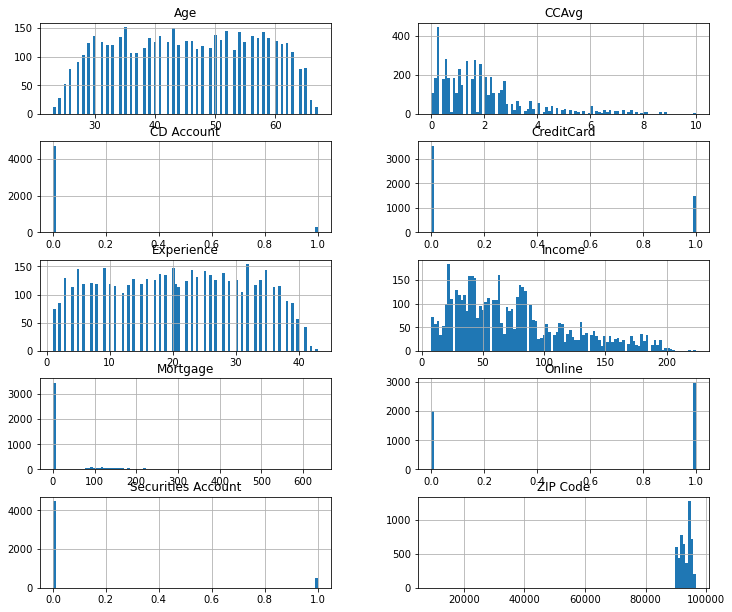

In [95]:
columns = list(loan_df_H)
loan_df_H[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

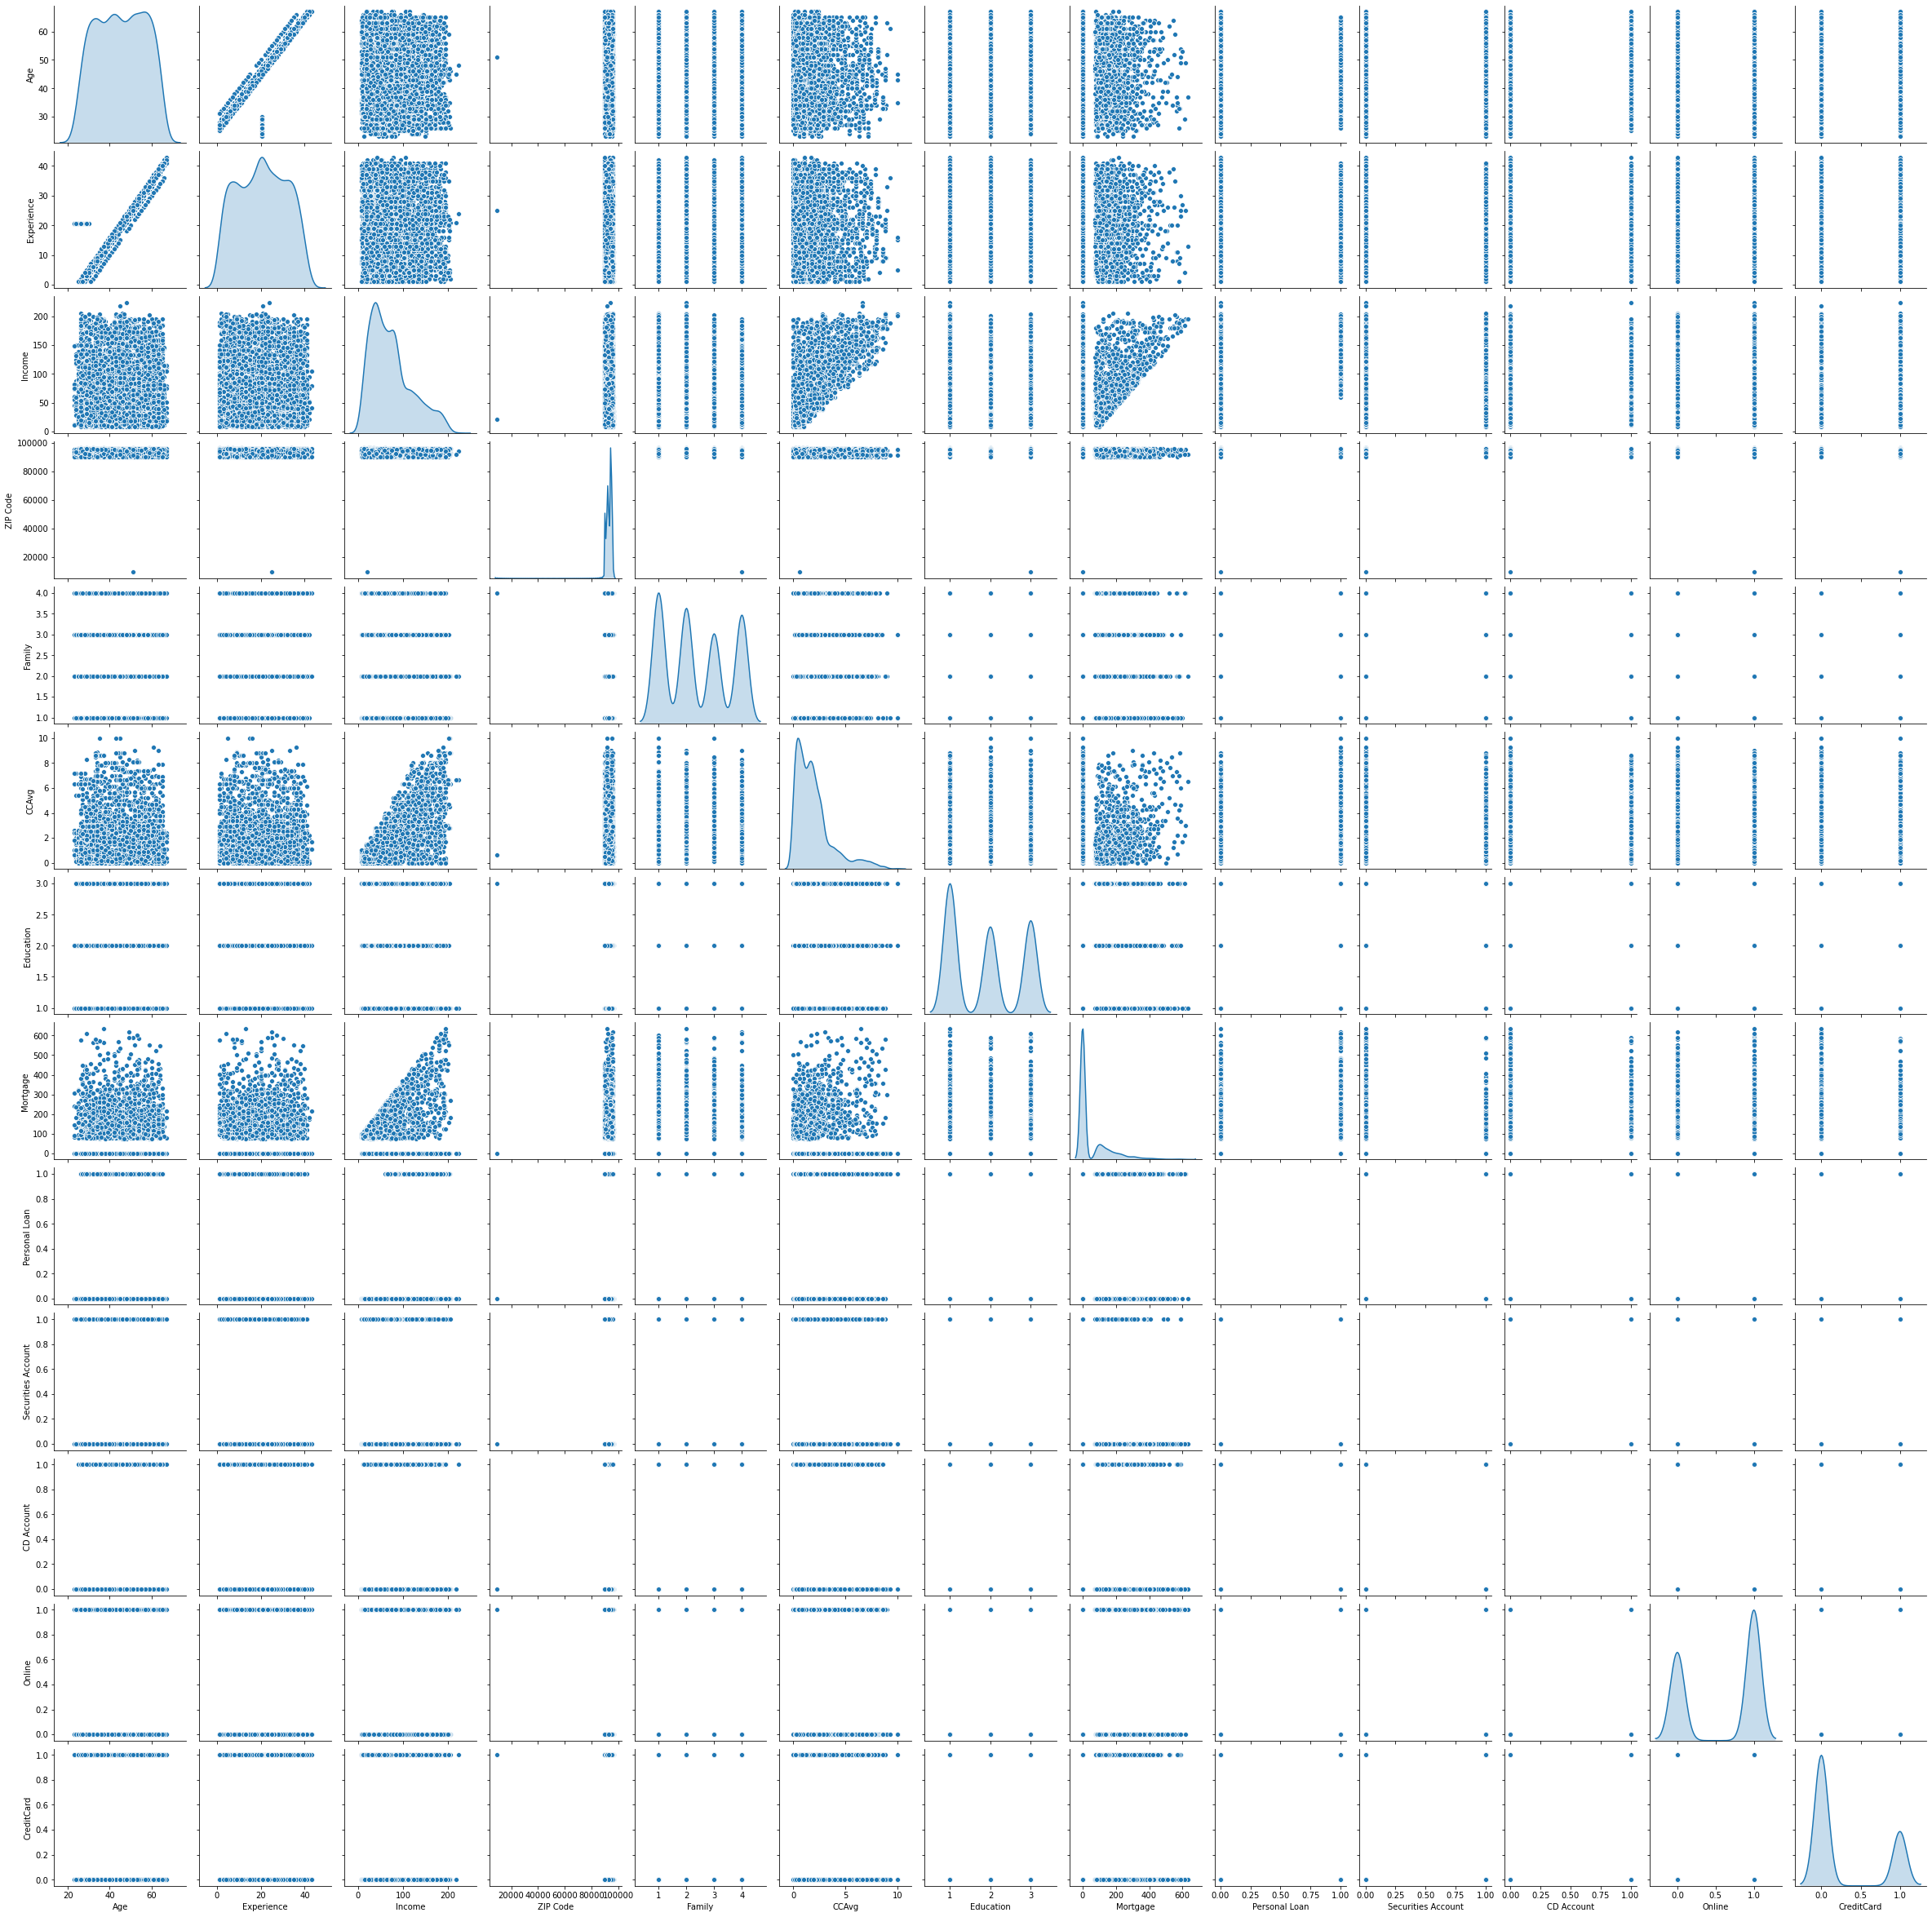

In [96]:
sns.pairplot(loan_df,diag_kind='kde')

Text(0, 0.5, 'Frequency of Loan')

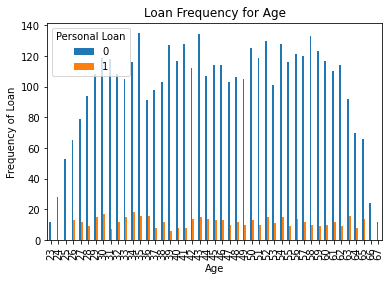

In [97]:
#Age Vs Personal Loan
%matplotlib inline
pd.crosstab(loan_df['Age'],loan_df['Personal Loan']).plot(kind='bar')
plt.title('Loan Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Loan')

**OBSERVATIONS:**
- Across the age 26 - 65, the frequency of personal loan acceptance is distributed.  So Age alone can not be a good predictor. 

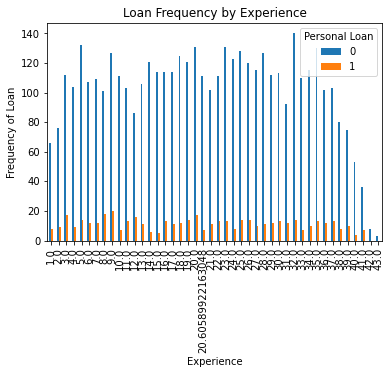

In [99]:
#Experience Vs Personal Loan
%matplotlib inline
pd.crosstab(loan_df['Experience'],loan_df['Personal Loan']).plot(kind='bar')
plt.title('Loan Frequency by Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency of Loan')
plt.savefig('Loan_fre_Experience')

**OBSERVATIONS:**
- The frequency of Personal Loan Acceptance is also distributed across the experience from 1 to 42 years, So Experience alone can not be a good predictor. But when we see correlation (Shown Down) Experience is more correlated with Age. We can drop one of these attributes to simplify the model.

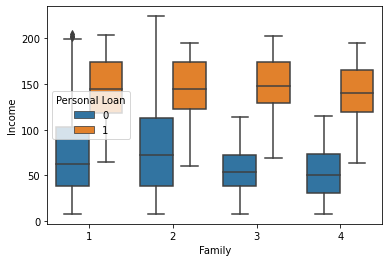

In [100]:
#Income Vs Family for personal loan acceptance
sns.boxplot(y = 'Income',x='Family',hue='Personal Loan',data = loan_df)
plt.show()

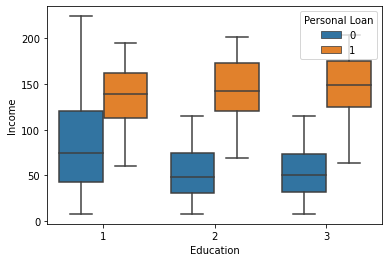

In [101]:
#Income Vs Education for personal loan acceptance
sns.boxplot(y = 'Income',x='Education',hue='Personal Loan',data = loan_df)
plt.show()

**OBSERVATIONS:**
    - All Education levels and Family size, Higher Income cusotmers only showing acceptance of personal loan
    - So Education,Family and Income are good predictors 

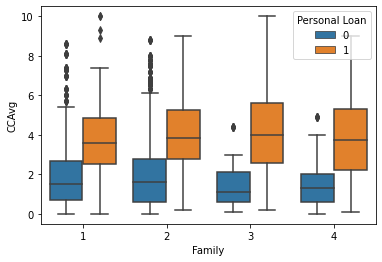

In [102]:
#CCAvg Vs Family for personal loan acceptance
sns.boxplot(y = 'CCAvg',x='Family',hue='Personal Loan',data = loan_df)
plt.show()

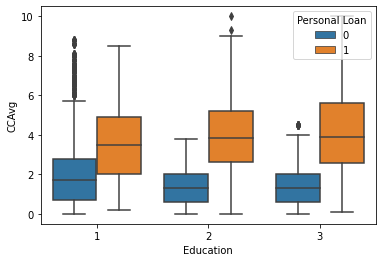

In [103]:
#CCAvg Vs Education for personal loan acceptance
sns.boxplot(y = 'CCAvg',x='Education',hue='Personal Loan',data = loan_df)
plt.show()

**OBSERVATIONS:**
    - All Education levels/Family sizes, with Higher CCAvg spending cusotmers only showing acceptance of personal loan
    - So CCAvg,Family size and Educations are good predictors 

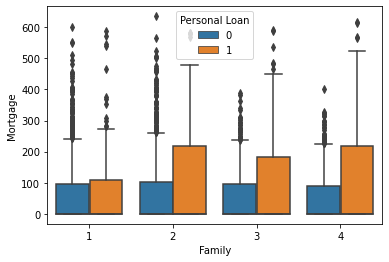

In [104]:
#Mortgage Vs Family for personal loan acceptance
sns.boxplot(y ='Mortgage',x='Family',hue='Personal Loan',data = loan_df)
plt.show()

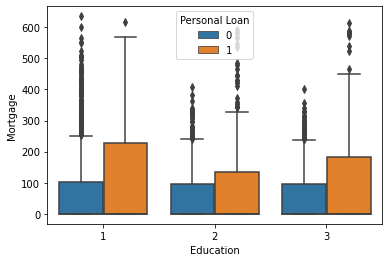

In [105]:
#Mortgage Vs Education for personal loan acceptance
sns.boxplot(y = 'Mortgage',x='Education',hue='Personal Loan',data = loan_df)
plt.show()

**OBSERVATIONS:**
    - All Education levels/Family size, Mortgage Value is not that influenced whether customer can accept or not accept the Personal loan and shows many outlayers
    - Mortgage is not a good predictors so we can drop this attribute from the model.

In [110]:
zip = loan_df.groupby(['ZIP Code']).sum()
zip.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ZIP Code,,,,,,,,,,
9307,51,25.00,21,0.60,0,0,0,0,1,1
90005,203,82.00,331,9.63,81,0,0,0,3,1
90007,323,175.00,428,16.00,420,0,0,0,4,2
90009,393,193.00,739,17.20,173,0,1,0,4,1
90011,153,79.00,158,2.60,249,0,0,0,2,0


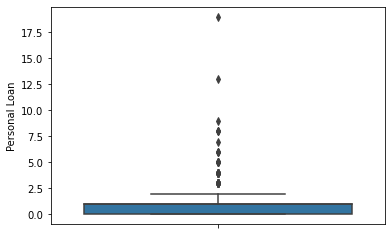

In [113]:
sns.boxplot(y= 'Personal Loan',data = zip)
plt.show()

**OBSERVATIONS:**
- Above Count plot shows less personal loans buying zip codes count are more and more personal loans buying zipcode customers are less
- Box plot shows all the outlayers , this kind of data is not a good predictor and almost all zipcodes are having significant amount of buying personal loans. So we can drop this column from the model instead of creating as many dummies to complicate model

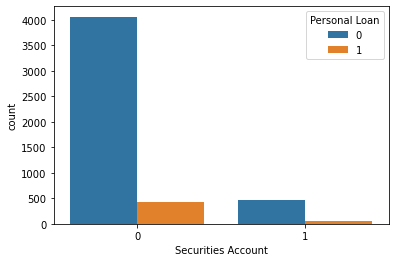

In [114]:
#Securities Account Vs personal loan acceptance
sns.countplot(x='Securities Account',hue='Personal Loan',data = loan_df)
plt.show()

OBSERVATIONS:

- Looks like who ever using Securities Account with the bank is not that good predictor because count of who dont have security accounts accepting personal loan is higher. May not be a good predictor. This attribute can be dropped out of model.

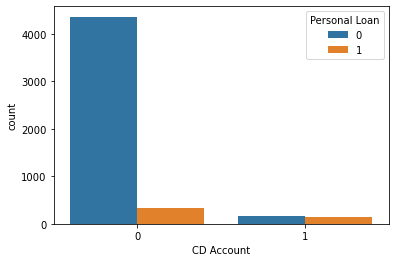

In [115]:
#CD Account Vs personal loan acceptance
sns.countplot(x='CD Account',hue='Personal Loan',data = loan_df)
plt.show()

OBSERVATIONS:

- Looks like who ever using CD Account with the bank is not that good predictor because count of who dont have CD accounts accepting personal loan is higher. May not be a good predictor.This attribute can be dropped out of model.

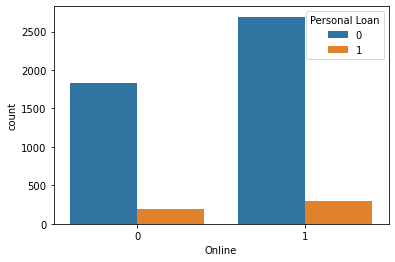

In [116]:
#Online Vs personal loan acceptance
sns.countplot(x='Online',hue='Personal Loan',data = loan_df)
plt.show()

OBSERVATIONS:

- Looks like who ever using internet banking are more towards personal loan but percentage of who are not pro to Personal Loan is very less. Might be a good predictor. 

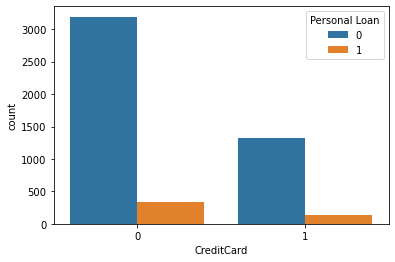

In [117]:
#CreditCard  Vs personal loan acceptance
sns.countplot(x='CreditCard',hue='Personal Loan',data = loan_df)
plt.show()

OBSERVATIONS:

- Looks like who ever using Credit card issued by the bank is not that good predictor because count of who dont have Credit cards accepting personal loan is higher. but significant difference can be preadicted. 

In [118]:
loan_df.corr()# It will show correlation matrix 

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.00,0.96,-0.06,-0.03,-0.05,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.96,1.00,-0.05,-0.03,-0.05,-0.02,-0.01,0.00,0.00,0.01,0.01
Income,-0.06,-0.05,1.00,-0.02,0.65,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,-0.03,-0.03,-0.02,1.00,-0.00,0.01,0.00,0.00,0.02,0.02,0.01
CCAvg,-0.05,-0.05,0.65,-0.00,1.00,0.11,0.37,0.02,0.14,-0.00,-0.01
Mortgage,-0.01,-0.02,0.21,0.01,0.11,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.01,-0.01,0.50,0.00,0.37,0.14,1.00,0.02,0.32,0.01,0.00
Securities Account,-0.00,0.00,-0.00,0.00,0.02,-0.01,0.02,1.00,0.32,0.01,-0.02
CD Account,0.01,0.00,0.17,0.02,0.14,0.09,0.32,0.32,1.00,0.18,0.28
Online,0.01,0.01,0.01,0.02,-0.00,-0.01,0.01,0.01,0.18,1.00,0.00


In [119]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(loan_df, size=20):
    corr = loan_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

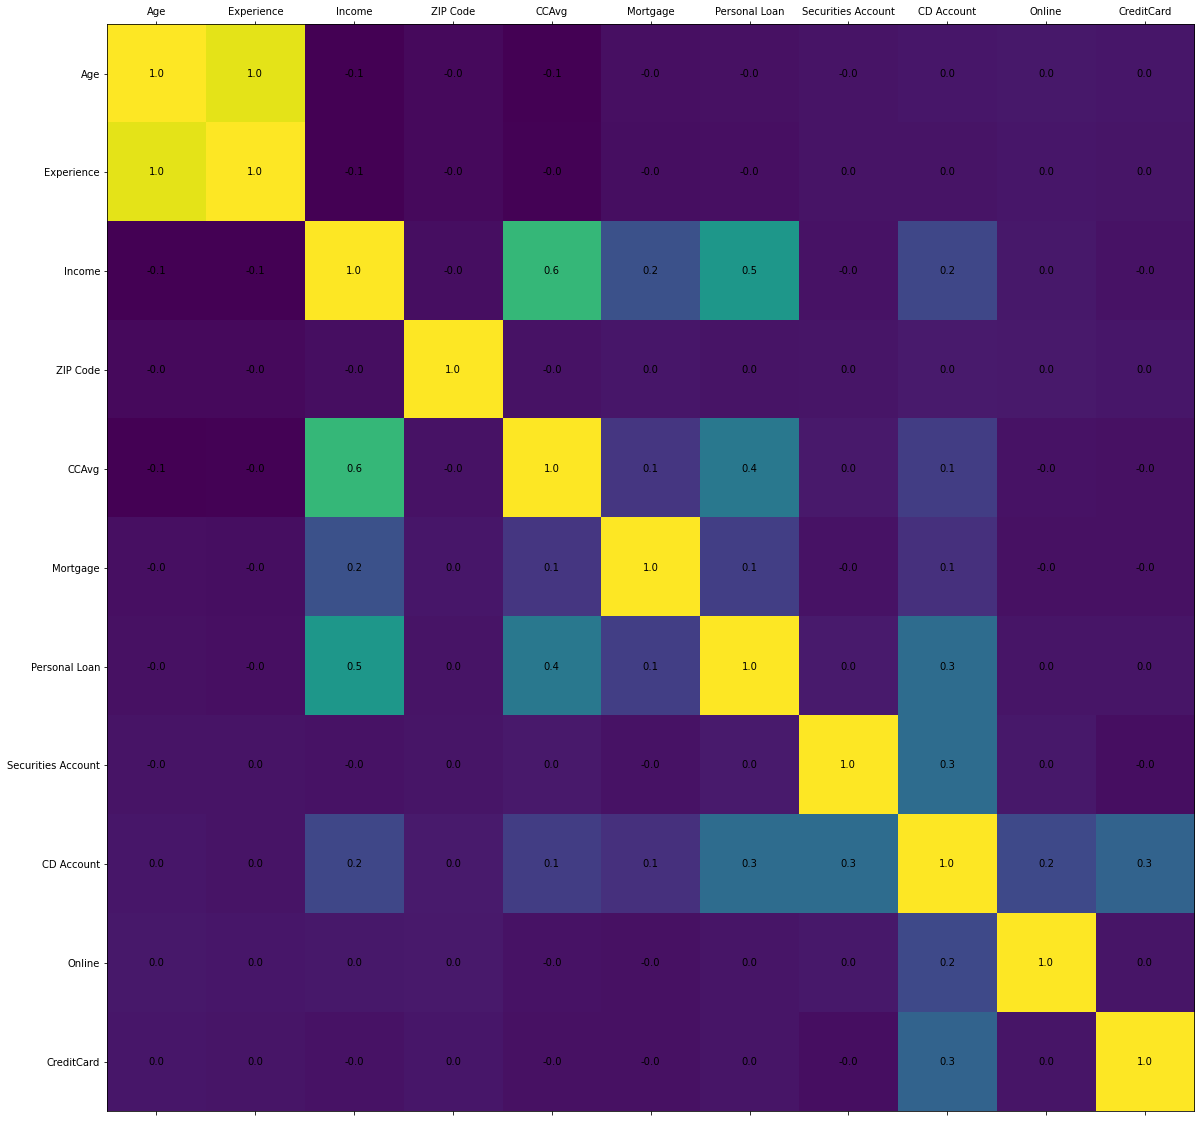

In [120]:
plot_corr(loan_df)

**OBSERVATIONS:**
- Age and Experience attributes are highly correlated (0.99) :: We can drop one of the attribute 
- Good Amount of correlation between CCAvg and Income (0.65) 
- Good Amount of correlation between CCAvg, Income towards personal loan buying

**Get data model ready**

**As we see earlier EDA analysis , the Experience attribute is highly correlated to Age. So we can drop Experience attribute**

In [121]:
loan_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.00,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19.00,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15.00,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9.00,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8.00,45,91330,4,1.00,2,0,0,0,0,0,1


In [122]:
# As discussed wth the visualization above, drop 'Age','ZIP Code','Mortgage','Securities Account','CD Account' 
#to prepare for model
loan_df.drop(['Age','ZIP Code','Mortgage','Securities Account','CD Account'], axis=1,inplace=True)

In [123]:
loan_df.head()

,Experience,Income,Family,CCAvg,Education,Personal Loan,Online,CreditCard
0,1.00,49,4,1.60,1,0,0,0
1,19.00,34,3,1.50,1,0,0,0
2,15.00,11,1,1.00,1,0,0,0
3,9.00,100,1,2.70,2,0,0,0
4,8.00,45,4,1.00,2,0,0,1


# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [124]:
from sklearn.model_selection import train_test_split

X = loan_df.drop('Personal Loan',axis=1)    
Y = loan_df['Personal Loan'].astype('category')   

In [125]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [126]:
X

,Experience,Income,CCAvg,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,1.00,49,1.60,0,0,0,0,1,0,0
1,19.00,34,1.50,0,0,0,1,0,0,0
2,15.00,11,1.00,0,0,0,0,0,0,0
3,9.00,100,2.70,0,0,0,0,0,1,0
4,8.00,45,1.00,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,3.00,40,1.90,1,0,0,0,0,0,1
4996,4.00,15,0.40,1,0,0,0,1,0,0
4997,39.00,24,0.30,0,0,1,0,0,0,1
4998,40.00,49,0.50,1,0,0,1,0,1,0


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=14)
# 14 is just any random seed number
X_train.head()

,Experience,Income,CCAvg,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
860,31.00,30,0.70,0,0,1,0,0,1,0
4479,8.00,128,4.33,1,0,1,0,0,0,0
2241,20.61,14,0.40,1,0,0,0,1,0,0
112,15.00,82,1.00,0,0,0,1,0,0,0
1269,11.00,14,0.20,1,1,0,0,1,0,1


In [128]:
y_train.head()

860     0
4479    0
2241    0
112     0
1269    0
Name: Personal Loan, dtype: category
Categories (2, int64): [0, 1]

In [129]:
#Lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(loan_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(loan_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [130]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loan_df.loc[loan_df['Personal Loan'] == 1]), (len(loan_df.loc[loan_df['Personal Loan'] == 1])/len(loan_df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loan_df.loc[loan_df['Personal Loan'] == 0]), (len(loan_df.loc[loan_df['Personal Loan'] == 0])/len(loan_df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 343 (9.80%)
Training Personal Loan False Values   : 3157 (90.20%)

Test Personal Loan True Values        : 137 (9.13%)
Test Personal Loan False Values       : 1363 (90.87%)



# 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [131]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [132]:
#predict on test
y_predict = model.predict(X_test)

In [133]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0    1    2     3    4     5    6    7    8    9  intercept
0 -0.00 0.05 0.12 -0.14 0.05 -0.45 1.36 0.91 2.60 2.76      -9.56


In [134]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9546666666666667


In [135]:
## function to get confusion matrix in a proper format
def draw_cm( y_test, y_predict ):
    cm = confusion_matrix(  y_test, y_predict)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9528571428571428

Testing accuracy 0.9546666666666667

Confusion Matrix


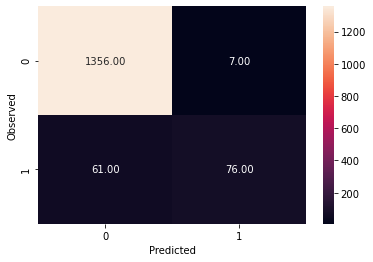

None

Recall: 0.5547445255474452

Precision: 0.9156626506024096

F1 Score: 0.6909090909090908

Roc Auc Score: 0.7748043977700542


In [136]:
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [137]:
#Accuracy 
#Accuracy = (tp+tn)/(tp+fp+fn+tn)
from sklearn.metrics import confusion_matrix,accuracy_score
print( 'Total Accuracy for test data : ',np.round( accuracy_score( y_test, y_predict ), 2 ) )

Total Accuracy for test data :  0.95


In [138]:
#precision
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
from sklearn.metrics import precision_score
print( 'precision : ',np.round( precision_score(y_test, y_predict), 2 ) )

precision :  0.92


In [139]:
#Recall - True Positive Rate - Sensitivity 
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The best value is 1 and the worst value is 0.
from sklearn.metrics import recall_score
print( 'recall : ',np.round(recall_score(y_test, y_predict), 2 ) )

recall :  0.55


In [140]:
#F1 Score
#F1 Score = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
print( 'f1_score : ',np.round(f1_score(y_test, y_predict), 2 ) )

f1_score :  0.69


In [141]:
#roc_auc_score
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
#The roc_auc_score always runs from 0 to 1, 
#and is sorting predictive possibilities. 0.5 is the baseline for random guessing,
#so we want to always get above 0.5.

from sklearn.metrics import roc_auc_score
print( 'roc_auc_score : ',np.round(roc_auc_score(y_test, y_predict), 2 ) )

roc_auc_score :  0.77


In [142]:
#Classification report with all metrics 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1363
           1       0.92      0.55      0.69       137

    accuracy                           0.95      1500
   macro avg       0.94      0.77      0.83      1500
weighted avg       0.95      0.95      0.95      1500



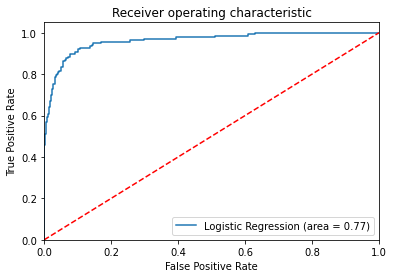

In [143]:
#%pip install yellowbrick
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [144]:
#Coefficients of the attributes 
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_3,2.76
8,Education_2,2.60
6,Family_3,1.36
7,Family_4,0.91
5,Family_2,0.45
3,Online,0.14
2,CCAvg,0.12
1,Income,0.05
4,CreditCard,0.05
0,Experience,0.00


In [146]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
#All the rows where the predicted class is not equal to the observed class
z[z['Observed Loan Status']!=z['Predicted Loan Status']]

,Experience,Income,CCAvg,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Observed Loan Status,Predicted Loan Status
3403,29.00,82,3.70,1,0,0,1,0,1,0,1,0
1486,9.00,141,4.50,0,0,1,0,0,1,0,1,0
2262,29.00,131,0.70,0,1,1,0,0,1,0,1,0
2885,31.00,113,0.60,1,0,0,0,1,0,1,1,0
2021,20.00,103,4.80,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3541,20.00,144,5.40,1,0,0,0,1,0,0,1,0
247,29.00,120,2.70,1,0,0,0,1,1,0,1,0
740,27.00,195,8.10,0,0,0,0,0,0,0,0,1
4179,3.00,91,3.40,0,0,0,0,0,0,1,1,0


In [150]:
y_test.shape

(1500,)

# 6. Give conclusion related to the Business understanding of your model? (5 marks)# 

##### `Confusion matrix and model performance`

*True Positive (observed=1,predicted=1):*  **- 76**

Predicted that the liability customer  will buy the Personal loan and the customer actually did buy the same

*False Positive (observed=0,predicted=1):* **- 7**

Predicted that the liability customer  will buy the Personal loan and the customer actually did not buy the same

*True Negative (observed=0,predicted=0):* **- 1356**

Predicted that the liability customer  will not buy the Personal loan and  the customer actually did not buy the same

*False Negative (observed=1,predicted=0):* **- 61**

Predicted the liability customer  will not buy the Personal loan and the customer actually did buy the same

##### `Important attributes that are influenced`

**"Education-3 (Advanced/Professional)", "Education-2 (Graduate)", "Family-3", "Family-4", "Family-2"** seems to be **top 5** features which influence the model's output. Based on the coefficients value.
**In summary Education and Family are very influence attributes to the model.**

and also Online banking customers (Coeff: 0.14), CCAvg spending customers (Coeff: 0.12), Income (Coeff: 0.05) and creditcard (Coeff: 0.05) atributes also has little influence. 

##### `Important Metric`

Here the bank wants to predict a personal loan buyer from the eligible liability customer during campaign. 
By seeing the confusion matrix we got a good amount of Accuracy (0.95) 

But as we have an unbalanced dataset, so accuracy becomes a poorer metric alone. 
Precision and Recall together be a good judge for better model.

Precision is a measure for the correctness of a positive prediction. In other words, it means that if a result is predicted as positive to buy personal loan, how sure can you be this is actually positive.

As our Precision is higher (0.92) we got most possible potential personal loan customers (TP) with this model.
obviously we have low recall (0.55). 
In summary F1 score (0.69) will be a btter score for this model.

And also we tried to be **less number of False Negitive**, if False Negitive is high bank would lose many potential buyers who are actually buy personal loan. 

On the otherhand if **number of False Positive** will not be a problem spending some time to campaign for not fit cusotmer.But aventually by seeing the confusion matrix we got a good amount of Accuracy (0.95) and Precision (0.92) with Good F1 score (0.69) with roc_auc_score :  0.77 which will sort predictive possibilities. 

Thera Bank can use this model for upcoming customers in the campaign to identify the customers who will buy personal loan.

# THANK YOU 